<a href="https://colab.research.google.com/github/Madhumitha0306/Data_Science_Project/blob/main/Level1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Exploration and Preprocessing**

In [1]:
# upload the dataset
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [8]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


In [9]:
# Basic info about dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\n First 5 rows")
print(df.head())

Number of rows: 9551
Number of columns: 21

 First 5 rows
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2

In [10]:
# Check for missing values
print("\n Missing values in each column")
print(df.isnull().sum())


 Missing values in each column
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [11]:
# Fill missing numeric columns with median and categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


/tmp/ipython-input-2390715795.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
# Convert data types
# convert 'Price range' and 'Votes' to numeric
if 'Price range' in df.columns:
    df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
if 'Votes' in df.columns:
    df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

print("\nData types after conversion ")
print(df.dtypes)


Data types after conversion 
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [15]:
# Analyze target variable 'Aggregate rating'
if 'Aggregate rating' in df.columns:
    print("\n--- Aggregate rating stats ---")
    print(df['Aggregate rating'].describe())




--- Aggregate rating stats ---
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


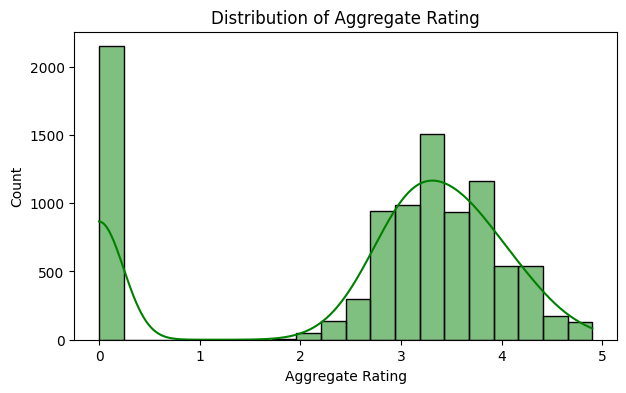

In [21]:
 # Plot the distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Aggregate rating'], bins=20, kde=True,color='green')
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()


Rating Category Counts:
Rating_Category
Average      4107
Good         2381
Very Good     491
Poor          296
Excellent     128
Name: count, dtype: int64


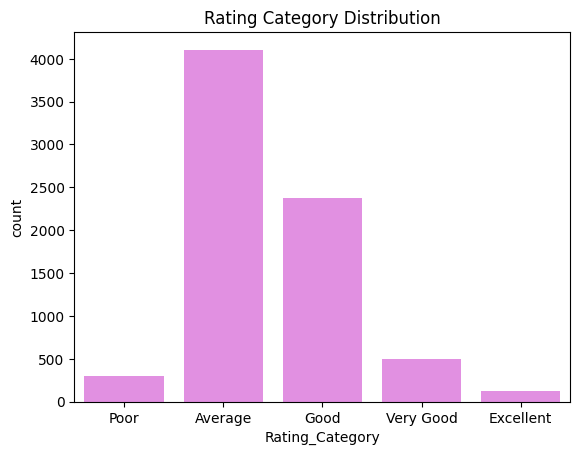

In [27]:
 # Check class imbalance (for classification-type analysis)
bins = [0, 2.5, 3.5, 4.2, 4.6, 5.0]
labels = ['Poor','Average','Good','Very Good','Excellent']
df['Rating_Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

print("\nRating Category Counts:")
print(df['Rating_Category'].value_counts())

sns.countplot(x='Rating_Category', data=df, order=labels,color='violet')
plt.title("Rating Category Distribution")
plt.show()


**Descriptive Analysis**

In [28]:
# Basic statistical measures for numerical columns
print("\n Basic Statistics for Numerical Columns ")
print(df.describe())



 Basic Statistics for Numerical Columns 
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%   

In [29]:
#Explore categorical variables
print("\n Country Code Counts")
if 'Country Code' in df.columns:
    print(df['Country Code'].value_counts().head(10))

print("\n City Counts ")
if 'City' in df.columns:
    print(df['City'].value_counts().head(10))

print("\n Cuisines Counts ")
if 'Cuisines' in df.columns:
    print(df['Cuisines'].value_counts().head(10))


 Country Code Counts
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

 City Counts 
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

 Cuisines Counts 
Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [30]:
# Top cuisines and cities with highest number of restaurants
print("\n Top 10 Cuisines ")
if 'Cuisines' in df.columns:
    # Split cuisines by comma and count each one
    cuisines = df['Cuisines'].dropna().astype(str).str.split(',')
    cuisines_exploded = cuisines.explode().str.strip()
    top_cuisines = cuisines_exploded.value_counts().head(10)
    print(top_cuisines)


 Top 10 Cuisines 
Cuisines
North Indian    3969
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


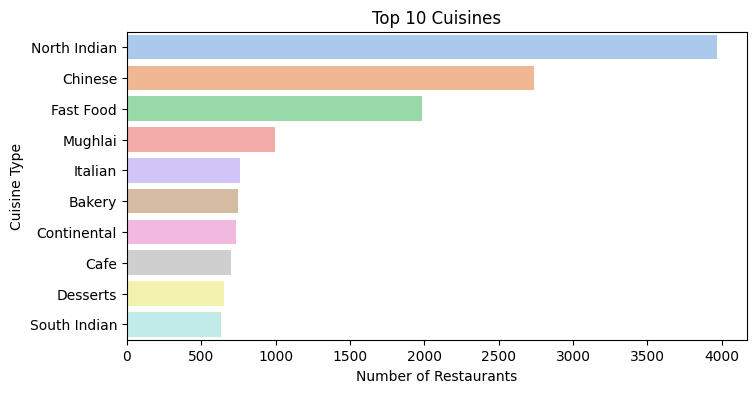

In [35]:
# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, hue=top_cuisines.index, palette="pastel", legend=False)

plt.title("Top 10 Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.show()

In [32]:
print("\n Top 10 Cities with Most Restaurants ")
if 'City' in df.columns:
    top_cities = df['City'].value_counts().head(10)
    print(top_cities)



 Top 10 Cities with Most Restaurants 
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


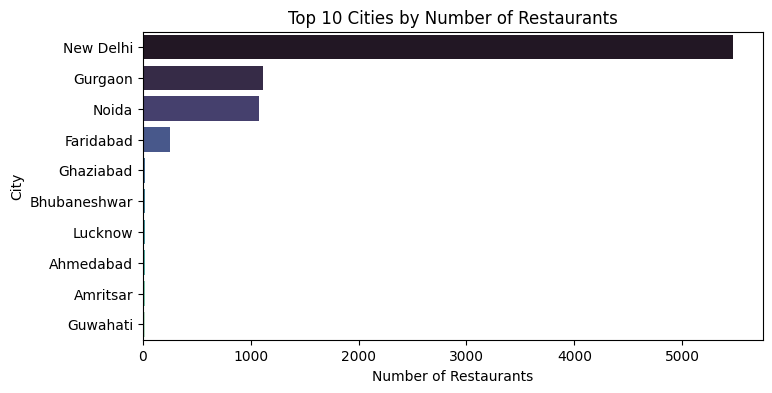

In [34]:
# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="mako", legend=False)
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

**Geospatial Analysis**

In [40]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [36]:
#  Basic info
print("Rows and Columns:", df.shape)
print("\nColumns:", df.columns.tolist())


Rows and Columns: (9551, 22)

Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Rating_Category']


In [38]:
 #Check if latitude and longitude exist
lat_col = None
lon_col = None

for c in df.columns:
    if 'lat' in c.lower():
        lat_col = c
    if 'lon' in c.lower():
        lon_col = c

print("Latitude column:", lat_col)
print("Longitude column:", lon_col)


Latitude column: Latitude
Longitude column: Longitude


In [48]:
# Show restaurants on a map
if lat_col and lon_col:
    m = folium.Map(location=[df[lat_col].mean(), df[lon_col].mean()], zoom_start=5)
    for i, row in df.dropna(subset=[lat_col, lon_col]).head(100).iterrows():
        folium.Marker(
            location=[row[lat_col], row[lon_col]],
            popup=row.get("Restaurant Name", "Restaurant")
        ).add_to(m)
    m
else:
    print("Latitude/Longitude not found — skipping map.")


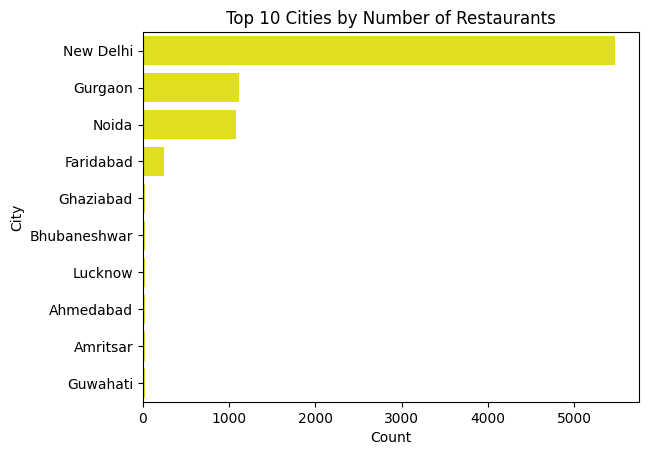

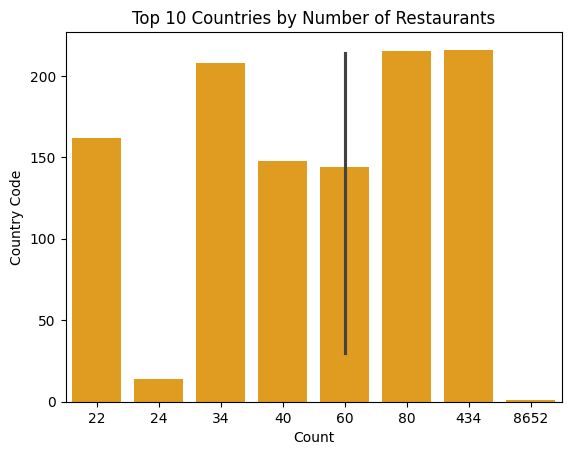

In [45]:
# Distribution of restaurants across cities and countries
if "City" in df.columns:
    top_cities = df["City"].value_counts().head(10)
    sns.barplot(x=top_cities.values, y=top_cities.index,color='yellow')
    plt.title("Top 10 Cities by Number of Restaurants")
    plt.xlabel("Count")
    plt.show()

if "Country Code" in df.columns:
    top_countries = df["Country Code"].value_counts().head(10)
    sns.barplot(x=top_countries.values, y=top_countries.index,color='orange')
    plt.title("Top 10 Countries by Number of Restaurants")
    plt.xlabel("Count")
    plt.show()


                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


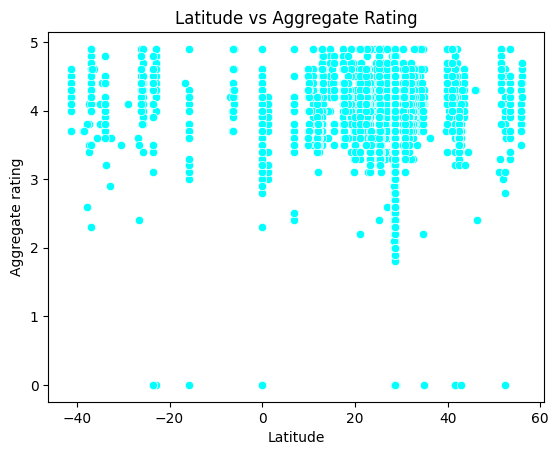

In [47]:
# Correlation between location and rating
if lat_col and lon_col and "Aggregate rating" in df.columns:
    df[["Aggregate rating", lat_col, lon_col]] = df[["Aggregate rating", lat_col, lon_col]].apply(pd.to_numeric, errors="coerce")
    print(df[[lat_col, lon_col, "Aggregate rating"]].corr())
    sns.scatterplot(x=df[lat_col], y=df["Aggregate rating"],color='cyan')
    plt.title("Latitude vs Aggregate Rating")
    plt.show()
else:
    print("Cannot check correlation — missing columns.")
